In [1]:
# Descarga de archivos de ProfNER
!wget https://zenodo.org/record/4563995/files/profner.zip?download=1
# Si el unzip no funciona, revisar cual es el nombre de descarga del archivo
!unzip  profner.zip?download=1

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: profner/subtask-1/test-background-txt-files/1243953060050763778.txt  
  inflating: profner/subtask-1/test-background-txt-files/1243988693947486209.txt  
  inflating: profner/subtask-1/test-background-txt-files/1244173600753618945.txt  
  inflating: profner/subtask-1/test-background-txt-files/1244319340062822405.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247000104193712129.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247263989249212416.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247465550931988482.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249075777544556545.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249253729720766466.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249964965546668034.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249980196838682624.txt  
  inflating: profner/subta

Funciones de carga y preparación de datos

In [2]:
import sys
import os
import pandas as pd
def get_tweet_content(list_paths):
  """
    Función para guardar en un diccionario el contenido de archivos txt
    que se introduce en su entrada.
    Devuelve un diccionario en el que las claves son el id del tweet, y
    el valor el texto del tweet.
  """
  output_dict = dict()
  for i in list_paths:
    tweet_id = i.split("/")[-1].split(".txt")[0]
    with open(i) as f:
      output_dict[int(tweet_id)] = f.read()

  return output_dict

def get_profner_data(profner_path_data):
    # Obtenemos el path a los txt de los tweets.
    path_to_txt = profner_path_data+"subtask-1/train-valid-txt-files/"
    tweets_train_files = [path_to_txt+"train/"+i for i in os.listdir(path_to_txt+"train/")]
    tweets_valid_files = [path_to_txt+"valid/"+i for i in os.listdir(path_to_txt+"valid/")]
    # Obtenemos diccionarios en los que el key es el tweet_id y el value el texto del tweet.
    train_txt_content = get_tweet_content(tweets_train_files)
    valid_txt_content = get_tweet_content(tweets_valid_files)

    # Cargamos dos dataframes con los tweet_id y la categoría de los tweets
    path_to_labeled = profner_path_data+"subtask-1/"
    train_tweets = pd.read_csv(path_to_labeled+"train.tsv",sep="\t")
    valid_tweets = pd.read_csv(path_to_labeled+"valid.tsv",sep="\t")

    # Introducimos a los df el campo de texto mapeando los diccionarios con tweet_id
    train_tweets["tweet_text"] = train_tweets['tweet_id'].map(train_txt_content)
    train_tweets["set"] = "train"
    valid_tweets["tweet_text"] = valid_tweets['tweet_id'].map(valid_txt_content)
    valid_tweets["set"] = "valid"

    # Concatenamos el resultado
    output_df = pd.concat([train_tweets,valid_tweets],axis=0)
    # Eliminamos retorno de carro
    output_df["tweet_text"] = output_df.tweet_text.apply(lambda x: x.replace('\n', ' '))
    return output_df[["tweet_id","tweet_text","label","set"]].reset_index(drop=True)

# Ejercicio


En este ejercicio se trabajará con un conjunto de datos reales publicados para la shared-task [ProfNER](https://temu.bsc.es/smm4h-spanish/), celebrada en el año 2021. Específicamente, se utilizarán los datos textuales de la subtarea 1, centrada en la clasificación de textos. Este conjunto de datos son tweets en español que tienen asignada una etiqueta numérica, que representa la presencia (valor 1) o no (valor 0) de menciones de profesiones en el tweet. Por si fuera de tu interés, el proceso de obtención, selección y anotación de datos está descrita en [este enlace.](https://temu.bsc.es/smm4h-spanish/?p=4003).

Para el ejercicio debéis entrenar diferentes modelos de clasificación que permitan clasificar correctamente los tweets. Para ello será necesario crear y utilizar funciones de preprocesado de datos similares a las vistas en clase, aplicar estrategias de vectorización de trextos como TF-IDF o embeddings, y entrenar/evaluar modelos de clasificación. Para que os sirva de orientación, los criterios de evaluación del ejercicio serán los siguientes:

-	**Análisis exploratorio, pre-procesado y normalización de los datos (30%)**:
        -	El ejercicio deberá contener un análisis exploratorio de los datos como número de documentos, gráficas de distribución de longitudes y/o wordclouds, entre otros análisis que se os pudieran ocurrir. Vuestros ejercicios deberán incorporar al menos los análisis exploratorios vistos en clase.

    -	También tendréis que tener funciones para normalizar textos que permitan eliminar palabras vacías, quitar símbolos de puntuación y lematizar o hacer stemming.

-	**Vectorización de textos (40%)**

    En clase hemos visto diferentes estrategias de vectorización como TF-IDF y Word Embeddings. También hemos visto como incorporar características adicionales utilizando el sentimiento de los documentos. Para este ejercicio sois libres de utilizar la estrategia de vectorización que queráis, pero:
  -	Si decidís utilizar TF-IDF será necesarios que incorporéis a modelo características adicionales de sentimiento utilizando recursos adicionales (como por ejemplo la librería TextBlob).
  -	Si optáis por representar el texto mediante embeddings, dado que en clase no se profundizado sobre el tema no será necesario incorporar esas características adicionales. Si decidís esta segunda opción, podéis utilizar los embeddings en español que vimos en clase

-	**Entrenamiento y validación del sistema (30%)**
  -	En el proceso de entrenamiento del modelo tendréis que testear al menos 3 modelos de clasificación. El procedimiento debe ser similar al visto en clase, en el que primero estimábamos el rendimiento de varios algoritmos de forma general, para posteriormente seleccionar el mejor para ajustar los hiperparámetros.


## 0. Imports


In [3]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np


## 1. Obtención del corpus
Para la obtención de los datos teneis disponible la función `get_profner_data()`. Esta función prepara los datos del ejercicio en formato Pandas dataframe para que podais realizarlo.

In [4]:
profner_path = "./profner/"
datos_ejercicio = get_profner_data(profner_path)

In [5]:
datos_ejercicio.head(4)

,tweet_id,tweet_text,label,set
0,1256007275807997953,CHINA: libera una pandemia EE.UU: libera OVNIS...,0,train
1,1257909427677601792,San Francisco (EEUU) hace 100 años tras vivir ...,0,train
2,1281580572415066112,Porfi poneos la mascarilla o tendremos 28 nuev...,0,train
3,1271348112733470720,El nuevo „covid normas y reglas recibimiento“ ...,0,train


In [6]:
import nltk
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import string
import re

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
datos_ejercicio['set'].value_counts()

train    6000
valid    2000
Name: set, dtype: int64

## 2. Análisis exploratorio

In [9]:
# Distribución de los datos.
no_mentions = datos_ejercicio['label'].value_counts()[0]
mentions = datos_ejercicio['label'].value_counts()[1]

print(f'En un total de {no_mentions} no se habla sobre profesiones, ello supone, el {(no_mentions / (no_mentions + mentions ))*100}% de los tweets. Por lo que podemos ver existe un desbalanceo de la clase 1')

En un total de 6130 no se habla sobre profesiones, ello supone, el 76.625% de los tweets. Por lo que podemos ver existe un desbalanceo de la clase 1


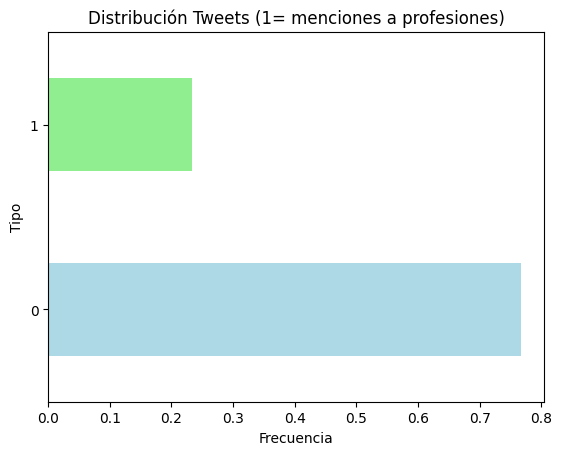

In [10]:
# Gráfico de distribución

valuex = datos_ejercicio['label'].value_counts(normalize=True, sort=True)
valuex.plot(kind = 'barh', rot=0, color= ["lightblue", "lightgreen"])
plt.title("Distribución Tweets (1= menciones a profesiones)")
plt.xlabel("Frecuencia")
plt.ylabel("Tipo");

In [11]:
# Incluir el largo de los tweets

datos_ejercicio["largo_tweet"] = datos_ejercicio["tweet_text"].map(lambda x: len(x))


# Función para crear histograma y boxplot en la misma representación.

def histogram_boxplot(data, xlabel = None, title = None, font_scale=2, figsize=(9,8), bins = None):
    """ Boxplot and histogram combined
    data: 1-d data array
    xlabel: xlabel
    title: title
    font_scale: the scale of the font (default 2)
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)

    example use: histogram_boxplot(np.random.rand(100), bins = 20, title="Fancy plot")
    """
    # Definir tamaño letra

    sns.set(font_scale=font_scale)
    # Crear ventana para los subgráficos

    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)
    # Crear boxplot

    sns.boxplot(x=data, ax=ax_box2)
    # Crear histograma
    sns.histplot(x=data, ax=ax_hist2, bins=bins) if bins else sns.histplot(x=data, ax=ax_hist2)
    # Pintar una línea con la media
    ax_hist2.axvline(np.mean(data),color='g',linestyle='-')
    # Pintar una línea con la mediana
    ax_hist2.axvline(np.median(data),color='y',linestyle='--')
    # Asignar título y nombre de eje si tal
    if xlabel: ax_hist2.set(xlabel=xlabel)
    if title: ax_box2.set(title=title, xlabel="")
    # Mostrar gráfico
    plt.show()

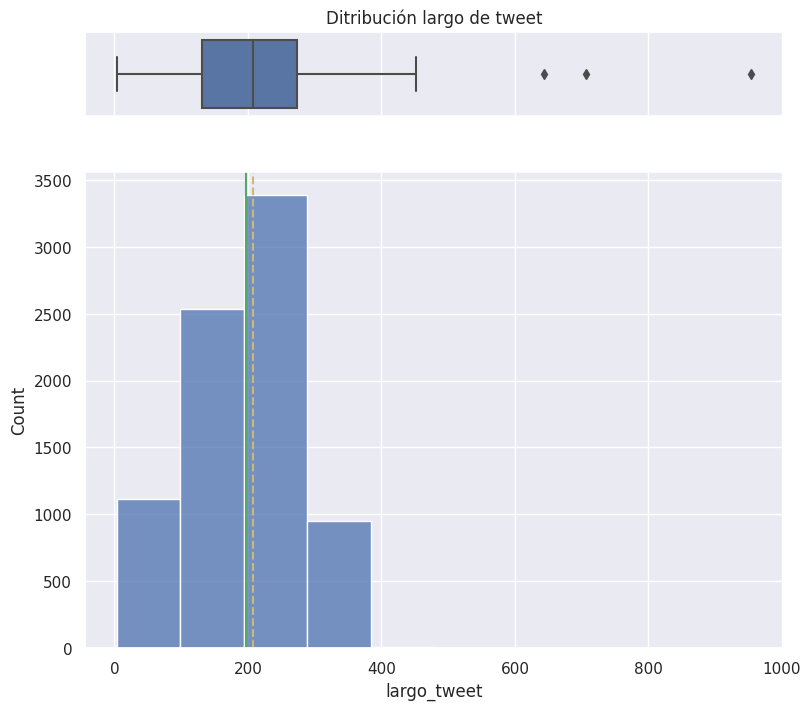

In [12]:
# Comprobamos la distribución del largo de los tweets,

histogram_boxplot(datos_ejercicio['largo_tweet'], bins = 10, font_scale=1, title='Ditribución largo de tweet')

<Figure size 1400x1200 with 0 Axes>

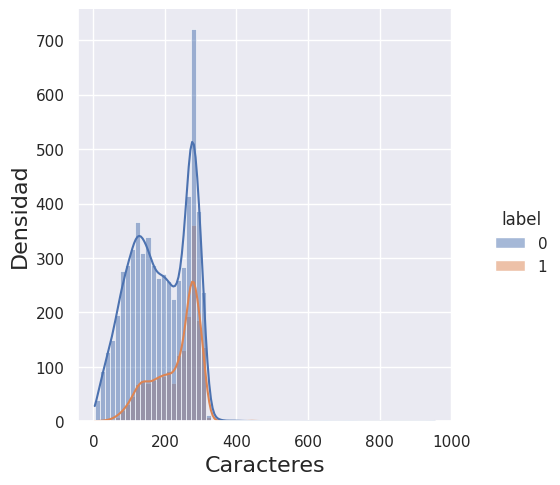

In [13]:
# Distribución de tweets por cada clase

fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")
# añadimos series para cada categoría (eligiendo la seríe de char_len

sns.displot(data= datos_ejercicio, x = "largo_tweet",hue='label', kde= True, legend=True)




# Definimos el título de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

# Finalmente mostramos el gráfico:
plt.show()

In [14]:
# Revisar outliers

outliers = datos_ejercicio[datos_ejercicio['largo_tweet']>360].shape[0]

print(f'Existen {outliers} tweets cuyo largo es mayor a 360 caracteres.')

Existen 9 tweets cuyo largo es mayor a 360 caracteres.


## 3. Preprocesado y Normalización

In [15]:
# Funciones unitarias de limpieza

# Eliminar espacios
def eliminar_espacios_(text):
    salida = text.replace(' ','')
    return salida

# Eliminar espacios
def eliminar_espacios(text):
    return  " ".join(text.split())

# To lower
def texto_to_lower(text):
  return text.lower()

# Tokenizador

def tokenization(text):
  tokens = word_tokenize(text, language="spanish")
  return tokens


# Quitar stop words

def quitar_stopwords(tokens):
    stop_words = set(stopwords.words('spanish'))
    filtered_sentence = [w for w in tokens if not w in stop_words]
    return filtered_sentence


# Eliminar signos de puntuación (nos quedamos sólo lo alfanumérico en este caso)
def quitar_puntuacion(tokens):
    words=[word for word in tokens if word.isalnum()]
    return words



# Lemmatization

nlp = spacy.load('en_core_web_sm', disable=["ner", "parser"])
def lematizar(tokens):
    sentence = " ".join(tokens)
    mytokens = nlp(sentence)
    # Lematizamos los tokens y los convertimos  a minusculas
    mytokens = [ word.lemma_ for word in mytokens ]
    # Extraemos el text en una string
    return mytokens



stemmer = PorterStemmer()
def stem(tokens):
    tokens = [ stemmer.stem(token) for token in tokens]
    return tokens


def eliminar_emojis(texto):
    patron_emoji = re.compile("["
                             u"\U0001F600-\U0001F64F"  # emoticonos
                             u"\U0001F300-\U0001F5FF"  # símbolos y pictogramas
                             u"\U0001F680-\U0001F6FF"  # transporte y símbolos de mapas
                             u"\U0001F1E0-\U0001F1FF"  # banderas de países
                             u"\U00002500-\U00002BEF"  # caracteres chinos, japoneses y coreanos (CJK)
                             u"\U00002702-\U000027B0"  # símbolos misceláneos
                             u"\U00002702-\U000027B0"
                             u"\U000024C2-\U0001F251"
                             u"\U0001f926-\U0001f937"
                             u"\U00010000-\U0010ffff"
                             u"\u200d"
                             u"\u2640-\u2642"
                             u"\u2600-\u2B55"
                             u"\u23cf"
                             u"\u23e9"
                             u"\u231a"
                             u"\u3030"
                             u"\ufe0f"
                             "]+", flags=re.UNICODE)

    return patron_emoji.sub('', texto)


def calculate_mentions(tokens):

  contador = 0

  for i in tokens:
    if i[0] == "@":

      contador += 1

  return contador

def calculate_urls(tokens):

  contador = 0
  for i in tokens:

    if i.startswith("http"):

      contador += 1

  return contador

In [17]:
# Funcion de limpieza

def limpieza_texto(df, column_to_analyze, new_column):


  df[new_column] = df[column_to_analyze].map(lambda x: eliminar_espacios(x))
  print('Eliminar espacio.')

  df[new_column] = df[new_column].map(lambda x: texto_to_lower(x))
  print('A lowers done.')

  df[new_column] = df[new_column].map(lambda x: eliminar_emojis(x))
  print('Eliminado de emojies done.')

  df[new_column] = df[new_column].map(lambda x: tokenization(x))
  print('Texto tokenizado done.')

  df[new_column] = df[new_column].map(lambda x: quitar_stopwords(x))
  print('Eliminando stopwords done.')

  df[new_column] = df[new_column].map(lambda x: quitar_puntuacion(x))
  print('Símbolos de puntuación eliminados done.')

  df[new_column] = df[new_column].map(lambda x: stem(x))
  print('Lematizado done.')

  df["mentions_calc"] = df[column_to_analyze].map(lambda x: calculate_mentions(x))
  print('Calculador menciones.')

  df["urls_calc"] = df[column_to_analyze].map(lambda x: calculate_urls(x))
  print('Calculador urls')

  return df

In [18]:
procesado = limpieza_texto(datos_ejercicio, 'tweet_text', 'normalizacion')

Eliminar espacio.
A lowers done.
Eliminado de emojies done.
Texto tokenizado done.
Eliminando stopwords done.
Símbolos de puntuación eliminados done.
Lematizado done.
Calculador menciones.
Calculador urls


In [19]:
procesado["clean_text"] = procesado["normalizacion"].map(lambda x: " ".join(x))

In [20]:
procesado

,tweet_id,tweet_text,label,set,largo_tweet,normalizacion,mentions_calc,urls_calc,clean_text
0,1256007275807997953,CHINA: libera una pandemia EE.UU: libera OVNIS...,0,train,87,"[china, libera, pandemia, libera, ovni, argent...",0,0,china libera pandemia libera ovni argentina li...
1,1257909427677601792,San Francisco (EEUU) hace 100 años tras vivir ...,0,train,90,"[san, francisco, eeuu, hace, 100, año, tra, vi...",0,0,san francisco eeuu hace 100 año tra vivir pand...
2,1281580572415066112,Porfi poneos la mascarilla o tendremos 28 nuev...,0,train,95,"[porfi, poneo, mascarilla, 28, nueva, cancion,...",0,0,porfi poneo mascarilla 28 nueva cancion artist...
3,1271348112733470720,El nuevo „covid normas y reglas recibimiento“ ...,0,train,225,"[nuevo, covid, norma, regla, recibimiento, com...",1,0,nuevo covid norma regla recibimiento comercio ...
4,1270421287148695556,Si el confinamiento ha dejado algo tocada tu e...,0,train,138,"[si, confinamiento, dejado, tocada, estabilida...",0,0,si confinamiento dejado tocada estabilidad men...
...,...,...,...,...,...,...,...,...,...
7995,1263939682662002689,#LoMásLeído | Los nuevos infectados de coronav...,0,valid,149,"[lomásleído, nuevo, infectado, coronaviru, mul...",1,0,lomásleído nuevo infectado coronaviru multipli...
7996,1259976635891306516,Ayuso adjudica a dedo un contrato de 30.000 eu...,1,valid,138,"[ayuso, adjudica, dedo, contrato, euro, hacer,...",0,0,ayuso adjudica dedo contrato euro hacer vídeo ...
7997,1277128552153055232,Meses encerrados. Se puede viajar a otras prov...,0,valid,280,"[mese, encerrado, pued, viajar, provincia, ir,...",0,0,mese encerrado pued viajar provincia ir restau...
7998,1267915731422916613,El gobierno prohíbe por ley lis despidos duran...,0,valid,159,"[gobierno, prohíb, ley, li, despido, crisi, co...",0,0,gobierno prohíb ley li despido crisi coronavir...


## 4. Vectorización

In [21]:
vectorizador = TfidfVectorizer(lowercase = False, stop_words =None,
                               min_df=0.01, ngram_range = (1,3), max_features = 300)

vector_data = vectorizador.fit_transform(procesado["clean_text"])

## 5. Entrenamiento y evaluación de modelos
